In [ ]:
# 코랩에 나눔고딕 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,278 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and di

In [ ]:
import os
os.kill(os.getpid(), 9) # 런타임 종료

In [ ]:
# 일단 import
import glob
import pandas as pd

%matplotlib inline

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

import seaborn as sns

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 데이터 준비
import numpy as np

data = np.random.randint(-200, 100, 50).cumsum()
# data

Text(0.5, 0, '시간(분)')

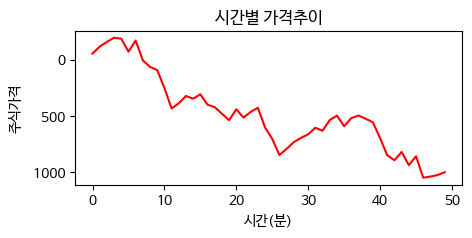

In [ ]:
# 한글을 넣어놓고 그러보면 깨진다
plt.figure(figsize=(5,2))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

In [ ]:
# 구글 드라이브 마운트하기.
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 데이터 로드

## 쓰레기통 데이터 로드

In [ ]:
import glob
import pandas as pd
trash_path = '/content/gdrive/MyDrive/ecothonCBB/data/쓰레기통_위경도_매칭'
filepaths = list(glob.glob(f'{trash_path}/*.csv'))
filepaths

['/content/gdrive/MyDrive/ecothonCBB/data/쓰레기통_위경도_매칭/양천구_담배꽁초쓰레기통_위경도.csv',
 '/content/gdrive/MyDrive/ecothonCBB/data/쓰레기통_위경도_매칭/영등포구_담배꽁초쓰레기통_위경도.csv',
 '/content/gdrive/MyDrive/ecothonCBB/data/쓰레기통_위경도_매칭/중랑구_담배꽁초쓰레기통_위경도.csv',
 '/content/gdrive/MyDrive/ecothonCBB/data/쓰레기통_위경도_매칭/강남구_담배꽁초쓰레기통_위경도.csv',
 '/content/gdrive/MyDrive/ecothonCBB/data/쓰레기통_위경도_매칭/동작구_담배꽁초쓰레기통_위경도.csv',
 '/content/gdrive/MyDrive/ecothonCBB/data/쓰레기통_위경도_매칭/마포구_담배꽁초쓰레기통_위경도.csv',
 '/content/gdrive/MyDrive/ecothonCBB/data/쓰레기통_위경도_매칭/서초구_담배꽁초쓰레기통_위경도.csv',
 '/content/gdrive/MyDrive/ecothonCBB/data/쓰레기통_위경도_매칭/종로구_담배꽁초쓰레기통_위경도.csv']

In [ ]:
# 데이터 확인
for file in filepaths:
    file_name =file.split('/')[-1].split('_')[0]
    display(f'{file_name}', pd.read_csv(file).shape, pd.read_csv(file).head(2))

'양천구'

(12, 6)

,address_name,경도,위도,도로명주소,설치장소,시군구명
0,서울 양천구 목동동로 293,126.875772,37.528178,서울시 양천구 목동동로 293,현대41타워앞 인도,양천구
1,서울 양천구 목동서로 57,126.879863,37.536632,서울시 양천구 목동서로 57,파리지앙A앞 공용주차장,양천구


'영등포구'

(204, 7)

,address_name,경도,위도,주소,동명,비고,시군구명
0,서울 영등포구 당산로32길 1-6,126.897267,37.526741,서울특별시 영등포구 당산로32길 1-6,당산1동,NaN,영등포구
1,서울 영등포구 국회대로36길 7-3,126.898124,37.526561,서울특별시 영등포구 국회대로36길 7-3,당산1동,NaN,영등포구


'중랑구'

(7, 10)

,address_name,경도,위도,설치장소,연번,도로명,설치 장소 유형,수거 쓰레기 종류,형태,시군구명
0,서울 중랑구 상봉동 130-3,127.074681,37.593233,서울특별시 중랑구 상봉동 130-3,1,망우로,담배꽁초 무단투기 취약지역,담배꽁초,담배꽁초 수거함,중랑구
1,서울 중랑구 묵동 122-361,127.078312,37.609267,서울특별시 중랑구 묵동 122-361,2,동일로,담배꽁초 무단투기 취약지역,담배꽁초,담배꽁초 수거함,중랑구


'강남구'

(54, 7)

,시군구명,동명,address_name,경도,위도,설치주소,위 치
0,강남구,신사동,서울 강남구 압구정로14길 6,127.022980,37.523858,서울특별시 강남구 압구정로14길 6,코다차야 남동쪽(가게 앞)
1,강남구,신사동,서울 강남구 강남대로152길 14,127.020699,37.517151,서울특별시 강남구 강남대로152길 14,FLASH BAR 동쪽(전신주)


'동작구'

(17, 7)

,시군구명,address_name,경도,위도,설치주소,설치장소(상호명),비고(관리연합회)
0,동작구,서울 동작구 만양로 108,126.944433,37.513068,서울특별시 동작구 만양로 108,노량진생고기,상가연합회
1,동작구,서울 동작구 만양로 102-3,126.944736,37.512609,서울특별시 동작구 만양로 102-3,두꺼비식당,상가연합회


'마포구'

(65, 8)

,시군구명,address_name,경도,위도,도로명주소,상호명,수량,세부위치
0,마포구,서울 마포구 광성로6길 66,126.940168,37.547265,서울특별시 마포구 광성로6길 66,마포나루장터,1,NaN
1,마포구,서울 마포구 대흥로 40,126.938931,37.544230,서울특별시 마포구 대흥로 40,블랙시스(아이나비),1,가게앞


'서초구'

(62, 9)

,시군구명,동명,설치주소,설치주체,청소관리,설치일자,위도,경도,비고
0,서초구,서초4동,교보타워(강남대로 465) 부지주차장 진입로 옆,교보타워,교보타워,2012-04-26,37.503756,127.02411,NaN
1,서초구,양재1동,엘타워 뒤 주차장 진입로 옆,엘타워,엘타워,2015-04-18,37.482767,127.03495,NaN


'종로구'

(38, 10)

,address_name,경도,위도,설치장소,연번,도로명,설치 장소 유형,수거 쓰레기 종류,형태,시군구명
0,서울 종로구 자하문로1길 12,126.971748,37.576573,자하문로1길 12,1,자하문로,상가지역,담배꽁초,담배꽁초 수거함,종로구
1,서울 종로구 자하문로1길 50-1,126.969680,37.577010,자하문로1길 50-1,2,자하문로,상가지역,담배꽁초,담배꽁초 수거함,종로구


### 컬럼 통일해서 하나로 합치기
- 'address_name', '시군구명', '위도', '경도'

In [ ]:
# 1. 양천구 (12, 6)
df_yangcheon = pd.read_csv(filepaths[0])
# ['address_name', '경도', '위도', '도로명주소', '설치장소', '시군구명']
df_yangcheon = df_yangcheon[['address_name', '시군구명', '위도', '경도']]
display(df_yangcheon.shape, df_yangcheon.head(2))

(12, 4)

,address_name,시군구명,위도,경도
0,서울 양천구 목동동로 293,양천구,37.528178,126.875772
1,서울 양천구 목동서로 57,양천구,37.536632,126.879863


In [ ]:
# 2. 영등포구 (204, 7)
df_yeongdeungpo = pd.read_csv(filepaths[1])
# ['address_name', '경도', '위도', '주소', '동명', '비고', '시군구명']
df_yeongdeungpo = df_yeongdeungpo[['address_name', '시군구명', '위도', '경도']]
display(df_yeongdeungpo.shape, df_yeongdeungpo.head(2))

(204, 4)

,address_name,시군구명,위도,경도
0,서울 영등포구 당산로32길 1-6,영등포구,37.526741,126.897267
1,서울 영등포구 국회대로36길 7-3,영등포구,37.526561,126.898124


In [ ]:
# 3. 중랑구 (7, 10)
df_jungnang = pd.read_csv(filepaths[2])
# ['address_name', '경도', '위도', '설치장소', '연번', '도로명', '설치 장소 유형', '수거 쓰레기 종류', '형태', '시군구명']
df_jungnang = df_jungnang[['address_name', '시군구명', '위도', '경도']]
display(df_jungnang.shape, df_jungnang.head(2))

(7, 4)

,address_name,시군구명,위도,경도
0,서울 중랑구 상봉동 130-3,중랑구,37.593233,127.074681
1,서울 중랑구 묵동 122-361,중랑구,37.609267,127.078312


In [ ]:
# 4. 강남구 (54, 7)
df_gangnam = pd.read_csv(filepaths[3])
# ['시군구명', '동명', 'address_name', '경도', '위도', '설치주소', '위  치']
df_gangnam = df_gangnam[['address_name', '시군구명', '위도', '경도']]
display(df_gangnam.shape, df_gangnam.head(2))

(54, 4)

,address_name,시군구명,위도,경도
0,서울 강남구 압구정로14길 6,강남구,37.523858,127.022980
1,서울 강남구 강남대로152길 14,강남구,37.517151,127.020699


In [ ]:
# 5. 동작구 (17, 7)
df_dongjak = pd.read_csv(filepaths[4])
# ['시군구명', 'address_name', '경도', '위도', '설치주소', '설치장소(상호명)', '비고(관리연합회)']
df_dongjak = df_dongjak[['address_name', '시군구명', '위도', '경도']]
display(df_dongjak.shape, df_dongjak.head(2))

(17, 4)

,address_name,시군구명,위도,경도
0,서울 동작구 만양로 108,동작구,37.513068,126.944433
1,서울 동작구 만양로 102-3,동작구,37.512609,126.944736


In [ ]:
# 6. 마포구 (65, 8)
df_mapo = pd.read_csv(filepaths[5])
# ['시군구명', 'address_name', '경도', '위도', '도로명주소', '상호명', '수량', '세부위치']
df_mapo = df_mapo[['address_name', '시군구명', '위도', '경도']]
display(df_mapo.shape, df_mapo.head(2))

(65, 4)

,address_name,시군구명,위도,경도
0,서울 마포구 광성로6길 66,마포구,37.547265,126.940168
1,서울 마포구 대흥로 40,마포구,37.544230,126.938931


In [ ]:
# 7. 종로구 (38, 10)
df_jongno = pd.read_csv(filepaths[7])
# ['address_name', '경도', '위도', '설치장소', '연번', '도로명', '설치 장소 유형', '수거 쓰레기 종류', '형태', '시군구명']
df_jongno = df_jongno[['address_name', '시군구명', '위도', '경도']]
display(df_jongno.shape, df_jongno.head(2))

(38, 4)

,address_name,시군구명,위도,경도
0,서울 종로구 자하문로1길 12,종로구,37.576573,126.971748
1,서울 종로구 자하문로1길 50-1,종로구,37.577010,126.969680


#### 서초구: 도로명 주소 컬럼 만들기

In [ ]:
# 서초구는 도로명 주소가 없으므로, 먼저 지번 주소를 도로명 주소로 변환한다.
df_seocho = pd.read_csv(filepaths[6])
df_seocho.head(2)

,시군구명,동명,설치주소,설치주체,청소관리,설치일자,위도,경도,비고
0,서초구,서초4동,교보타워(강남대로 465) 부지주차장 진입로 옆,교보타워,교보타워,2012-04-26,37.503756,127.02411,NaN
1,서초구,양재1동,엘타워 뒤 주차장 진입로 옆,엘타워,엘타워,2015-04-18,37.482767,127.03495,NaN


In [ ]:
# 컬럼을 뽑아서 위경도 컬럼 만들기
cols = ['위도', '경도']

df_seocho['위경도'] = df_seocho[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
display(df_seocho.head(2), df_seocho.tail(2))

,시군구명,동명,설치주소,설치주체,청소관리,설치일자,위도,경도,비고,위경도
0,서초구,서초4동,교보타워(강남대로 465) 부지주차장 진입로 옆,교보타워,교보타워,2012-04-26,37.503756,127.02411,NaN,"37.50375605,127.02410954"
1,서초구,양재1동,엘타워 뒤 주차장 진입로 옆,엘타워,엘타워,2015-04-18,37.482767,127.03495,NaN,"37.48276664,127.03494955"


,시군구명,동명,설치주소,설치주체,청소관리,설치일자,위도,경도,비고,위경도
60,서초구,서초2동,서초동 1340-6 남강빌딩 흡연지역,청소행정과,청소행정과,2020-05-13,37.489195,127.031360,NaN,"37.48919472,127.03136032"
61,서초구,양재1동,우면동 18-1(2기동대 앞),청소행정과,청소행정과,2020-10-30,37.472439,127.030514,NaN,"37.47243914,127.03051405"


- 12, 13인덱스 행의 위도 값이 잘못되어 있다! => 12, 13 인덱스 행은 삭제!

In [ ]:
df_seocho.loc[12, ['위도', '경도', '위경도']]

위도                  37350643574.0
경도                     127.006834
위경도    37350643574.0,127.00683437
Name: 12, dtype: object

In [ ]:
df_seocho.loc[13, ['위도', '경도', '위경도']]

위도                  37350643574.0
경도                     127.006834
위경도    37350643574.0,127.00683437
Name: 13, dtype: object

In [ ]:
# 12, 13인덱스 행 삭제
df_seocho.drop(df_seocho.index[12:14], inplace=True)
df_seocho = df_seocho.reset_index(drop=True)
df_seocho.head(2)

,시군구명,동명,설치주소,설치주체,청소관리,설치일자,위도,경도,비고,위경도
0,서초구,서초4동,교보타워(강남대로 465) 부지주차장 진입로 옆,교보타워,교보타워,2012-04-26,37.503756,127.02411,NaN,"37.50375605,127.02410954"
1,서초구,양재1동,엘타워 뒤 주차장 진입로 옆,엘타워,엘타워,2015-04-18,37.482767,127.03495,NaN,"37.48276664,127.03494955"


In [ ]:
from geopy.geocoders import Nominatim

def geocoding_reverse(lat_lng_str):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)

    return address

# 테스트
address = geocoding_reverse('37.503756, 127.024110')
print(address)

교보타워, 465, 강남대로, 서초동, 서초구, 서울, 06611, 대한민국


In [ ]:
road_address = []
for i in range(df_seocho.shape[0]):
    road_address.append(str(geocoding_reverse(df_seocho.loc[i, '위경도'])[0]).split(','))

road_address

[['교보타워', ' 465', ' 강남대로', ' 서초동', ' 서초구', ' 서울', ' 06611', ' 대한민국'],
 ['스포타임', ' 강남대로', ' 양재1동', ' 서초구', ' 서울', ' 06750', ' 대한민국'],
 ['서울가정행정법원 (Seoul Family and Administrative Court)',
  ' 강남대로',
  ' 양재1동',
  ' 서초구',
  ' 서울',
  ' 06744',
  ' 대한민국'],
 ['사평대로', ' 반포4동', ' 서초구', ' 서울', ' 06546', ' 대한민국'],
 ['대각빌딩', ' 서초대로78길', ' 서초동', ' 서초구', ' 서울', ' 06620', ' 대한민국'],
 ['방배로', ' 방배1동', ' 서초구', ' 서울', ' 06665', ' 대한민국'],
 ['우리은행', ' 서초대로78길', ' 서초동', ' 서초구', ' 서울', ' 06621', ' 대한민국'],
 ['삼성쉐르빌2', ' 서초대로74길', ' 서초동', ' 서초구', ' 서울', ' 06627', ' 대한민국'],
 ['방배천로', ' 방배2동', ' 서초구', ' 서울', ' 06693', ' 대한민국'],
 ['서희타워', ' 남부순환로', ' 7반', ' 1통', ' 서초동', ' 서초구', ' 서울', ' 06750', ' 대한민국'],
 ['타워주차장', ' 반포대로', ' 반포동', ' 반포4동', ' 서초구', ' 서울', ' 06546', ' 대한민국'],
 ['양재2동', ' 서초구', ' 서울', ' 06772', ' 대한민국'],
 ['서초구청', ' 남부순환로', ' 서초동', ' 서초구', ' 서울', ' 06750', ' 대한민국'],
 ['방배동', ' 서초구', ' 서울', ' 06677', ' 대한민국'],
 ['서울 방배경찰서', ' 방배천로', ' 방배동', ' 서초구', ' 서울', ' 06677', ' 대한민국'],
 ['광석교회', ' 방배천로4안길', '

In [ ]:
new_road_address = []
for i in range(len(road_address)):
    temp = [road_address[i][x] for x in range(len(road_address[i])-3, -1, -1)]
    new_road_address.append(' '.join(temp))

new_road_address

[' 서울  서초구  서초동  강남대로  465 교보타워',
 ' 서울  서초구  양재1동  강남대로 스포타임',
 ' 서울  서초구  양재1동  강남대로 서울가정행정법원 (Seoul Family and Administrative Court)',
 ' 서울  서초구  반포4동 사평대로',
 ' 서울  서초구  서초동  서초대로78길 대각빌딩',
 ' 서울  서초구  방배1동 방배로',
 ' 서울  서초구  서초동  서초대로78길 우리은행',
 ' 서울  서초구  서초동  서초대로74길 삼성쉐르빌2',
 ' 서울  서초구  방배2동 방배천로',
 ' 서울  서초구  서초동  1통  7반  남부순환로 서희타워',
 ' 서울  서초구  반포4동  반포동  반포대로 타워주차장',
 ' 서울  서초구 양재2동',
 ' 서울  서초구  서초동  남부순환로 서초구청',
 ' 서울  서초구 방배동',
 ' 서울  서초구  방배동  방배천로 서울 방배경찰서',
 ' 서울  서초구  방배동  방배천로4안길 광석교회',
 ' 서울  서초구  양재1동  강남대로 동성빌딩',
 ' 서울  서초구  양재1동  양재천로21길 세븐일레븐',
 ' 서울  서초구  양재동 강남대로25길',
 ' 서울  서초구  양재동 마방로',
 ' 서울  서초구  양재2동  마방로10길 퍼스트치과의원',
 ' 서울  서초구  양재동 논현로1길',
 ' 서울  서초구  양재동 논현로1길',
 ' 서울  서초구  양재2동  강남대로8길 양재공영주차장(유료)',
 ' 서울  서초구  양재동 강남대로2길',
 ' 서울  서초구  양재2동  양재동  강남대로4길 현대자동차서비스',
 ' 서울  서초구  양재2동  양재동  강남대로6길 한국산업연구소',
 ' 서울  서초구  양재동 강남대로8길',
 ' 서울  서초구  양재동 강남대로10길',
 ' 서울  서초구  양재동 마방로2길',
 ' 서울  서초구  양재동  양재대로 양곡도매시장',
 ' 서울  서초구  양재1동  바우뫼로37길 문어세상 양재점',
 ' 서울 

In [ ]:
# list(리스트)로부터 'address_name'열을 추가.
df_seocho['address_name'] = new_road_address

In [ ]:
display(df_seocho.shape, df_seocho.head(2))

(60, 11)

,시군구명,동명,설치주소,설치주체,청소관리,설치일자,위도,경도,비고,위경도,address_name
0,서초구,서초4동,교보타워(강남대로 465) 부지주차장 진입로 옆,교보타워,교보타워,2012-04-26,37.503756,127.02411,NaN,"37.50375605,127.02410954",서울 서초구 서초동 강남대로 465 교보타워
1,서초구,양재1동,엘타워 뒤 주차장 진입로 옆,엘타워,엘타워,2015-04-18,37.482767,127.03495,NaN,"37.48276664,127.03494955",서울 서초구 양재1동 강남대로 스포타임


In [ ]:
# 30번 인덱스의 address_name 컬럼의 '경기도' 삭제하기
df_seocho.loc[30, 'address_name']

' 서울  서초구  양재동  양재대로 양곡도매시장'

In [ ]:
df_seocho = df_seocho.replace({'address_name' : df_seocho.loc[30, 'address_name']}, '서울  서초구  양재동  양재대로 양곡도매시장')
display(df_seocho.shape, df_seocho.head(2))

(60, 11)

,시군구명,동명,설치주소,설치주체,청소관리,설치일자,위도,경도,비고,위경도,address_name
0,서초구,서초4동,교보타워(강남대로 465) 부지주차장 진입로 옆,교보타워,교보타워,2012-04-26,37.503756,127.02411,NaN,"37.50375605,127.02410954",서울 서초구 서초동 강남대로 465 교보타워
1,서초구,양재1동,엘타워 뒤 주차장 진입로 옆,엘타워,엘타워,2015-04-18,37.482767,127.03495,NaN,"37.48276664,127.03494955",서울 서초구 양재1동 강남대로 스포타임


In [ ]:
# 8. 서초구 (60, 11)
# ['시군구명', '동명', '설치주소', '설치주체', '청소관리', '설치일자', '위도', '경도', '비고', '위경도', 'address_name']
df_seocho = df_seocho[['address_name', '시군구명', '위도', '경도']]
display(df_seocho.shape, df_seocho.head(2))

(60, 4)

,address_name,시군구명,위도,경도
0,서울 서초구 서초동 강남대로 465 교보타워,서초구,37.503756,127.02411
1,서울 서초구 양재1동 강남대로 스포타임,서초구,37.482767,127.03495


#### 하나로 merge

```
# 1. 양천구: (12, 4)
# 2. 영등포구: (204, 4)
# 3. 중랑구: (7, 4)
# 4. 강남구 (54, 4)
# 5. 동작구: (17, 4)
# 6. 마포구: (65, 4)
# 7. 종로구 (38, 4)
# 8. 서초구 (60, 4)
```

In [ ]:
df_8_gu = pd.concat([df_yangcheon, df_yeongdeungpo, df_jungnang, df_gangnam, df_dongjak, df_mapo, df_jongno, df_seocho])
df_8_gu = df_8_gu.reset_index(drop=True)
display(df_8_gu.shape, df_8_gu.head(2))

(457, 4)

,address_name,시군구명,위도,경도
0,서울 양천구 목동동로 293,양천구,37.528178,126.875772
1,서울 양천구 목동서로 57,양천구,37.536632,126.879863


#### csv 파일로 저장

In [ ]:
df_8_gu.to_csv('/content/gdrive/MyDrive/ecothonCBB/data/서울_쓰레기통(전체).csv', index=False)

In [ ]:
pd.read_csv('/content/gdrive/MyDrive/ecothonCBB/data/서울_쓰레기통(전체).csv')

,address_name,시군구명,위도,경도
0,서울 양천구 목동동로 293,양천구,37.528178,126.875772
1,서울 양천구 목동서로 57,양천구,37.536632,126.879863
2,서울 양천구 오목로 232,양천구,37.525764,126.863206
3,서울 양천구 중앙로 276,양천구,37.520836,126.852884
4,서울 양천구 오목로 325,양천구,37.525107,126.873627
...,...,...,...,...
452,서울 서초구 양재2동 양재동 강남대로6길 한국산업연구소,서초구,37.467537,127.041653
453,서울 서초구 양재1동 우면동 중앙로 586,서초구,37.457240,127.015931
454,서울 서초구 양재동 강남대로6길,서초구,37.467059,127.042944
455,서울 서초구 서초동 강남대로 스타벅스,서초구,37.489195,127.031360


### ① 시군구별 쓰레기통 개수 count

In [ ]:
df_8_cnt = df_8_gu.groupby('시군구명')['address_name'].count().to_frame().sort_values(
    by='address_name', ascending=False)
df_8_cnt

,address_name
시군구명,
영등포구,204
마포구,65
서초구,60
강남구,54
종로구,38
동작구,17
양천구,12
중랑구,7


## 서울상권_인구_위경도(수정) 데이터 로드

In [ ]:
df_sang = pd.read_csv('/content/gdrive/MyDrive/ecothonCBB/data/서울상권_인구_위경도(수정).csv')
display(df_sang.shape, df_sang.head(2))

(6674, 14)

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,시도명,시군구_코드,시군구명,행정동_코드,행정동명,위도,경도
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,112658,서울,11680,강남구,580,삼성1동,37.511003,127.060059
1,2022,3,U,관광특구,1001496,강남 마이스 관광특구,112779,서울,11680,강남구,580,삼성1동,37.511003,127.060059


### ② 시군구별 상권 수 count

In [ ]:
df_sang_cnt = df_sang.groupby('시군구명')['상권_코드'].count().to_frame().sort_values(
    by='상권_코드',
    ascending=False)
df_sang_cnt = df_sang_cnt.reset_index(drop=False)
df_sang_cnt

,시군구명,상권_코드
0,강남구,412
1,영등포구,392
2,중구,312
3,서초구,310
4,동대문구,308
5,종로구,308
6,마포구,308
7,성북구,304
8,관악구,296
9,송파구,280


### ③ 시군구별, 상권_구분_코드_명별 상권 수 count

- df_sang 데이터가
> - 각 `상권_구분_코드_명`별, 2022년 기준으로 1분기~4분기 데이터가 모두 있으므로, '상권_구분_코드_명'도 포함해서 group화를 진행했다.

In [ ]:
# 강남구에, 상권_구분_코드_명별 1~4분기로 나뉘어 있음을 확인할 수 있다.
df_sang[df_sang['시군구명'] == '강남구']

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,시도명,시군구_코드,시군구명,행정동_코드,행정동명,위도,경도
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,112658,서울,11680,강남구,580,삼성1동,37.511003,127.060059
1,2022,3,U,관광특구,1001496,강남 마이스 관광특구,112779,서울,11680,강남구,580,삼성1동,37.511003,127.060059
2,2022,2,U,관광특구,1001496,강남 마이스 관광특구,106859,서울,11680,강남구,580,삼성1동,37.511003,127.060059
3,2022,1,U,관광특구,1001496,강남 마이스 관광특구,92815,서울,11680,강남구,580,삼성1동,37.511003,127.060059
88,2022,4,R,전통시장,2130310,강남개포시장,211859,서울,11680,강남구,670,개포2동,37.488807,127.067651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,2022,1,A,골목상권,2110950,논현역 7번,154264,서울,11680,강남구,521,논현1동,37.513611,127.023991
2880,2022,4,A,골목상권,2110949,한남IC,377545,서울,11680,강남구,510,신사동,37.520856,127.019423
2881,2022,3,A,골목상권,2110949,한남IC,364738,서울,11680,강남구,510,신사동,37.520856,127.019423
2882,2022,2,A,골목상권,2110949,한남IC,382817,서울,11680,강남구,510,신사동,37.520856,127.019423


In [ ]:
df_sang_code_cnt = df_sang.groupby(['시군구명', '상권_구분_코드_명'])['상권_코드'].count().to_frame()
df_sang_code_cnt = df_sang_code_cnt.sort_values(by='상권_코드', ascending=False)
df_sang_code_cnt = df_sang_code_cnt.reset_index(level=1)
df_sang_code_cnt = df_sang_code_cnt.reset_index(drop=False)
df_sang_code_cnt

,시군구명,상권_구분_코드_명,상권_코드
0,영등포구,골목상권,248
1,성북구,골목상권,232
2,강남구,골목상권,216
3,강서구,골목상권,204
4,마포구,골목상권,204
...,...,...,...
75,용산구,관광특구,4
76,송파구,관광특구,4
77,도봉구,발달상권,4
78,강남구,관광특구,4


### ④ 시군구별 평균 생활인구 수
- 생활인구를 `평균`으로 구한 이유는, df_sang 데이터가
> - 각 `상권_구분_코드_명`별, 2022년 기준으로 1분기~4분기 데이터가 모두 있기 때문이다.

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df_pop_mean = df_sang.groupby('시군구명')['총_생활인구_수'].mean().to_frame()
df_pop_mean = df_pop_mean.sort_values(by='총_생활인구_수', ascending=False)
df_pop_mean = df_pop_mean.reset_index(drop=False)
df_pop_mean

,시군구명,총_생활인구_수
0,강동구,1155269.42
1,송파구,998028.03
2,관악구,944885.28
3,광진구,924018.77
4,은평구,895001.46
5,강서구,849492.41
6,중랑구,842675.61
7,강남구,820165.58
8,마포구,788933.22
9,노원구,763344.80


### ⑤ 시군구별, 상권_구분_코드_명별 평균 생활인구 수

In [ ]:
df_pop_code_mean = df_sang.groupby(['시군구명', '상권_구분_코드_명'])['총_생활인구_수'].mean().to_frame()
df_pop_code_mean = df_pop_code_mean.sort_values(by='총_생활인구_수', ascending=False)
df_pop_code_mean = df_pop_code_mean.reset_index(level=1)
df_pop_code_mean = df_pop_code_mean.reset_index(drop=False)
df_pop_code_mean

,시군구명,상권_구분_코드_명,총_생활인구_수
0,종로구,관광특구,3864423.00
1,중구,관광특구,3699181.88
2,송파구,관광특구,3469611.00
3,관악구,발달상권,2204633.75
4,용산구,관광특구,2008554.00
...,...,...,...
75,종로구,전통시장,148172.64
76,강남구,전통시장,123410.22
77,용산구,전통시장,120760.39
78,강남구,관광특구,106277.75


## ⑤ 상습투기지역 데이터 로드

In [ ]:
df_tugi = pd.read_csv('/content/gdrive/MyDrive/ecothonCBB/data/상습_투기지역/용산구_마포구_상습투기지역_수정본.csv')
display(df_tugi.shape, df_tugi.head(2))

(10, 5)

,도로명주소,상세위치,시군구명,위도,경도
0,서울 용산구 후암로57길 17,새꿈어린이공원,용산구,37.55,126.97
1,서울 용산구 한강대로77길 12,다이소 남영역점 옆,용산구,37.54,126.97


# 시군구 json 파일 로드

In [ ]:
import requests
import folium
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

## ②(시군구별 상권 수 count) 를 기준으로 쓰레기통 위치 시각화

In [ ]:
# ②(시군구별 상권 수 count)
df_sang_cnt

,시군구명,상권_코드
0,강남구,412
1,영등포구,392
2,중구,312
3,서초구,310
4,동대문구,308
5,종로구,308
6,마포구,308
7,성북구,304
8,관악구,296
9,송파구,280


In [ ]:
# 쓰레기통 위치 데이터
df_8_gu.head(2)

,address_name,시군구명,위도,경도
0,서울 양천구 목동동로 293,양천구,37.53,126.88
1,서울 양천구 목동서로 57,양천구,37.54,126.88


### 지도 위에 글자 넣기



- 데이터 출처: [# 전국 시군구 위도(latitude)와 경도(longitude)](https://blog.naver.com/PostView.naver?blogId=kiakass&logNo=222449339999&from=search&redirect=Log&widgetTypeCall=true&directAccess=false)

In [ ]:
korea_lat_long = pd.read_excel('/content/gdrive/MyDrive/ecothonCBB/data/korea_administrative_division_latitude_longitude.xlsx')
display(korea_lat_long.shape, korea_lat_long.head(2))

(295, 5)

,docity,do,city,longitude,latitude
0,강원강릉시,강원,강릉시,128.88,37.75
1,강원고성군,강원,고성군,128.47,38.38


In [ ]:
# df_sang_cnt(시군구별 상권 수 count 데이터)에 포함된 시군구만 추출
seoul_list = list(df_sang_cnt['시군구명'])
print(seoul_list)

['강남구', '영등포구', '중구', '서초구', '동대문구', '종로구', '마포구', '성북구', '관악구', '송파구', '강서구', '은평구', '강북구', '서대문구', '광진구', '중랑구', '강동구', '구로구', '용산구', '동작구', '양천구', '성동구', '금천구', '도봉구', '노원구']


In [ ]:
# seoul_lat_long에서 'do' 컬럼에 '서울'이 포함된 값만 추출
seoul_lat_long = korea_lat_long[korea_lat_long['do'] == '서울']
seoul_lat_long = seoul_lat_long.reset_index(drop=True)
seoul_lat_long

,docity,do,city,longitude,latitude
0,서울강남구,서울,강남구,127.05,37.51
1,서울강동구,서울,강동구,127.13,37.53
2,서울강북구,서울,강북구,127.03,37.64
3,서울강서구,서울,강서구,126.85,37.55
4,서울관악구,서울,관악구,126.95,37.48
5,서울광진구,서울,광진구,127.08,37.54
6,서울구로구,서울,구로구,126.89,37.49
7,서울금천구,서울,금천구,126.90,37.45
8,서울노원구,서울,노원구,127.06,37.65
9,서울도봉구,서울,도봉구,127.05,37.67


In [ ]:
# 서울 시군구의 평균 위도, 경도
latitude, longitude = seoul_lat_long['latitude'].mean(), seoul_lat_long['longitude'].mean()
print(latitude, longitude)

37.55056844444441 126.99087966666625


- seoul_lat_long 데이터프레임을 딕셔너리 형태로 변환

In [ ]:
# 25개 구
# 위도경도 매핑
locs = {}
for i in range(len(seoul_lat_long)):
    lat = seoul_lat_long.loc[i, 'latitude']
    long = seoul_lat_long.loc[i, 'longitude']
    locs[seoul_lat_long.loc[i, 'city']] = (lat,long)

In [ ]:
locs

{'강남구': (37.514575, 127.049555555555),
 '강동구': (37.5273666666666, 127.125863888888),
 '강북구': (37.6369555555555, 127.027719444444),
 '강서구': (37.5481555555555, 126.851675),
 '관악구': (37.4753861111111, 126.953844444444),
 '광진구': (37.5357388888888, 127.084533333333),
 '구로구': (37.49265, 126.889597222222),
 '금천구': (37.4491083333333, 126.904197222222),
 '노원구': (37.6514611111111, 127.058388888888),
 '도봉구': (37.6658333333333, 127.049522222222),
 '동대문구': (37.571625, 127.042141666666),
 '동작구': (37.5096555555555, 126.941575),
 '마포구': (37.5607055555555, 126.910530555555),
 '서대문구': (37.5763666666666, 126.938897222222),
 '서초구': (37.4807861111111, 127.034811111111),
 '성동구': (37.5606111111111, 127.039),
 '성북구': (37.5863833333333, 127.020333333333),
 '송파구': (37.5117555555555, 127.107930555555),
 '양천구': (37.5142305555555, 126.868708333333),
 '영등포구': (37.5236111111111, 126.898341666666),
 '용산구': (37.5360944444444, 126.967522222222),
 '은평구': (37.5999694444444, 126.931241666666),
 '종로구': (37.5703777777777, 1

In [ ]:
# 지도 위에 표시할 시군구명의 위치
locs_2 = {
    '강남구': (37.494575, 127.032055555555),
    '강동구': (37.5533666666666, 127.123863888888),
    '강북구': (37.6369555555555, 126.990719444444),
    '강서구': (37.5581555555555, 126.801675),
    '관악구': (37.4703861111111, 126.913844444444),
    '광진구': (37.5457388888888, 127.064533333333),
    '구로구': (37.49865, 126.829597222222),
    '금천구': (37.4591083333333, 126.876047222222),
    '노원구': (37.6514611111111, 127.048388888888),
    '도봉구': (37.6658333333333, 127.003022222222),
    '동대문구': (37.581625, 127.030141666666),
    '동작구': (37.5036555555555, 126.921575),
    '마포구': (37.5607055555555, 126.870530555555),
    '서대문구': (37.5763666666666, 126.908897222222),
    '서초구': (37.4807861111111, 126.990811111111),
    '성동구': (37.5506111111111, 127.0190),
    '성북구': (37.6013833333333, 127.000333333333),
    '송파구': (37.5117555555555, 127.088930555555),
    '양천구': (37.5182305555555, 126.828708333333),
    '영등포구': (37.5236111111111, 126.888341666666),
    '용산구': (37.5360944444444, 126.954922222222),
    '은평구': (37.6199694444444, 126.901241666666),
    '종로구': (37.5903777777777, 126.951641666666),
    '중구': (37.5610027777777, 126.959641666666),
    '중랑구': (37.6038055555555, 127.068777777777)
    }

- 쓰레기통 데이터의 위도, 경도 값만 가져와서 하나로 합치기

In [ ]:
coords = df_8_gu[['위도','경도']]
# coords

In [ ]:
from folium.features import DivIcon
from folium.plugins import MarkerCluster

seoul = folium.Map(
    location=[latitude, longitude],
    zoom_start=11,
    tiles='cartodbpositron'
)


seoul.choropleth(geo_data=seoul_geo, # geo json 파일
                 data=df_sang_cnt, # 사용할 데이터
                 columns=['시군구명', '상권_코드'], # 데이터에서 사용할 컬럼
                 fill_color='YlOrRd', # 색상 변경도 가능하다
                 fill_opacity=0.5, # 지도 투명도
                 line_opacity=0.2, # 경계선 색
                 key_on='properties.name', # 시도명 매핑
                 legend_name="지역구별 상권 수" # 범례 이름
                 )

for key, value in locs_2.items():
    folium.map.Marker(
        # 위경도 위치
        [value[0], value[1]],

        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),

            html='<div\
                    style="\
                        font-size: 0.8rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key +'</b></div>'
        )).add_to(seoul)

marker_cluster = MarkerCluster().add_to(seoul)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon=folium.Icon(color='green')).add_to(marker_cluster)


seoul.save('/content/gdrive/MyDrive/ecothonCBB/지역구별 쓰레기통 개수.html')
seoul

### 지도에 표시된 숫자 확인

In [ ]:
df_8_cnt

,address_name
시군구명,
영등포구,204
마포구,65
서초구,60
강남구,54
종로구,38
동작구,17
양천구,12
중랑구,7


## ④(시군구별 평균 생활인구 수)를 기준으로 쓰레기통 위치 시각화

In [ ]:
# ④(시군구별 평균 생활인구 수)
df_pop_mean.head(2)

,시군구명,총_생활인구_수
0,강동구,1155269.42
1,송파구,998028.03


### 시각화

In [ ]:
seoul_pop = folium.Map(
    location=[latitude, longitude],
    zoom_start=11,
    tiles='cartodbpositron'
)


seoul_pop.choropleth(geo_data=seoul_geo, # geo json 파일
                 data=df_pop_mean, # 사용할 데이터
                 columns=['시군구명', '총_생활인구_수'], # 데이터에서 사용할 컬럼
                 fill_color= 'YlGnBu', # 'YlGnBu', # 'PuBuGn', # 색상 변경도 가능하다
                 fill_opacity=0.5, # 지도 투명도
                 line_opacity=0.2, # 경계선 색
                 key_on='properties.name', # 시도명 매핑
                 legend_name="지역구별 평균 생활인구 수" # 범례 이름
                 )

for key, value in locs_2.items():
    folium.map.Marker(
        [value[0], value[1]],

        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),

            html='<div\
                    style="\
                        font-size: 0.8rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key +'</b></div>'
        )).add_to(seoul_pop)

marker_cluster = MarkerCluster().add_to(seoul_pop)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon=folium.Icon(color='green')).add_to(marker_cluster)

seoul_pop.save('/content/gdrive/MyDrive/ecothonCBB/생활인구별 쓰레기통 개수.html')
seoul_pop

## ②(시군구별 상권 수 count)를 기준으로 ⑤(상습투기지역) 위치 시각화

In [ ]:
# ⑤(상습투기지역)
df_tugi

,도로명주소,상세위치,시군구명,위도,경도
0,서울 용산구 후암로57길 17,새꿈어린이공원,용산구,37.55,126.97
1,서울 용산구 한강대로77길 12,다이소 남영역점 옆,용산구,37.54,126.97
2,서울 용산구 한강대로77길 13,본투비 남영본점 옆,용산구,37.54,126.97
3,서울 용산구 한강대로 100,아모레퍼시픽그룹 본사 뒤,용산구,37.53,126.97
4,서울 용산구 백범로 341,원효1동주민센터 맞은편 아파트,용산구,37.54,126.97
5,서울 용산구 한강대로 186,평양집 안쪽 골목,용산구,37.53,126.97
6,서울 마포구 양화로 156,홍대입구역 9번출구 LG팰리스 뒤쪽 도로,마포구,37.56,126.92
7,서울 마포구 양화로 183,홍대입구역 3번출구 인근,마포구,37.56,126.93
8,서울 마포구 마포대로 144,마포T타운 뒤쪽 도로,마포구,37.55,126.95
9,서울 마포구 상암산로 38,상암동 jtbc kbs 건물 인근,마포구,37.58,126.89


In [ ]:
from folium.features import DivIcon
from folium.plugins import MarkerCluster

seoul = folium.Map(
    location=[latitude, longitude],
    zoom_start=11,
    tiles='cartodbpositron'
)


seoul.choropleth(geo_data=seoul_geo, # geo json 파일
                 data=df_sang_cnt, # 사용할 데이터
                 columns=['시군구명', '상권_코드'], # 데이터에서 사용할 컬럼
                 fill_color='YlOrRd', # 색상 변경도 가능하다
                 fill_opacity=0.5, # 지도 투명도
                 line_opacity=0.2, # 경계선 색
                 key_on='properties.name', # 시도명 매핑
                 legend_name="지역구별 상권 수" # 범례 이름
                 )

for key, value in locs_2.items():
    folium.map.Marker(
        [value[0], value[1]],

        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),

            html='<div\
                    style="\
                        font-size: 0.8rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key +'</b></div>'
        )).add_to(seoul)

marker_cluster = MarkerCluster().add_to(seoul)

# lat, long 을 지도에 표시
for i in df_tugi.index :
    sub_lat = df_tugi.loc[i, '위도']
    sub_long = df_tugi.loc[i, '경도']

    # 마우스를 가져다대면, 나타나는 부분
    tooltip = df_tugi.loc[i, '상세위치']

    folium.Marker([sub_lat, sub_long],
                  icon = folium.Icon(color = 'blue', icon='info-sign'),
                  tooltip= tooltip,
                  ).add_to(marker_cluster)

seoul.save('/content/gdrive/MyDrive/ecothonCBB/지역구별 상습투기 위치.html')
seoul

## ④(시군구별 평균 생활인구 수)를 기준으로 ⑤(상습투기지역) 위치 시각화

In [ ]:
seoul_pop = folium.Map(
    location=[latitude, longitude],
    zoom_start=11,
    tiles='cartodbpositron'
)


seoul_pop.choropleth(geo_data=seoul_geo, # geo json 파일
                 data=df_pop_mean, # 사용할 데이터
                 columns=['시군구명', '총_생활인구_수'], # 데이터에서 사용할 컬럼
                 fill_color= 'YlGnBu', # 'YlGnBu', # 'PuBuGn', # 색상 변경도 가능하다
                 fill_opacity=0.5, # 지도 투명도
                 line_opacity=0.2, # 경계선 색
                 key_on='properties.name', # 시도명 매핑
                 legend_name="지역구별 평균 생활인구 수" # 범례 이름
                 )

for key, value in locs_2.items():
    folium.map.Marker(
        [value[0], value[1]],

        icon=DivIcon(
            icon_size=(0, 0),
            icon_anchor=(0, 0),

            html='<div\
                    style="\
                        font-size: 0.8rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.2);\
                        width:85px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            + key +'</b></div>'
        )).add_to(seoul_pop)

marker_cluster = MarkerCluster().add_to(seoul_pop)


# lat, long 을 지도에 표시
for i in df_tugi.index :
    sub_lat = df_tugi.loc[i, '위도']
    sub_long = df_tugi.loc[i, '경도']

    # 마우스를 가져다대면, 나타나는 부분
    tooltip = df_tugi.loc[i, '상세위치']

    folium.Marker([sub_lat, sub_long],
                  icon = folium.Icon(color = 'blue', icon='info-sign'),
                  tooltip= tooltip,
                #   bins = bins
                  ).add_to(marker_cluster)
seoul_pop.save('/content/gdrive/MyDrive/ecothonCBB/생활인구별 투기 위치.html')
seoul_pop